## Amphibole vs. Pyroxene - LEPR calibration datasets

In [1]:
import Thermobar as pt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pickle import load
import pickle

In [16]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    LEPR_Amp_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Amp")
    LEPR_Amp_PreFilt=LEPR_Amp_in['Amps']

LEPR_Amp_amp_sites=pt.get_amp_sites_from_input(amp_comps=LEPR_Amp_PreFilt)
LEPR_Amp=LEPR_Amp_PreFilt
LEPR_Amp_nosuf=LEPR_Amp.copy()
LEPR_Amp_nosuf.drop(columns=['F_Amp', 'Cl_Amp'], inplace=True)
cLEPR_Amp_nosuf['Phase']=0

LEPR_Amp_cpx_heads=LEPR_Amp.copy()
LEPR_Amp_cpx_heads.columns = [col.replace('_Amp', '_Cpx') for col in LEPR_Amp_cpx_heads.columns]
LEPR_Amp_cpx_sites=pt.calculate_clinopyroxene_components(cpx_comps=LEPR_Amp_cpx_heads)



In [17]:
a=3.95
b=4.95
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    LEPR_Cpx_in=pt.import_excel('MachineLearning_MinClass.xlsx', sheet_name="Cpx")
    LEPR_px_input=LEPR_Cpx_in['my_input']
    LEPR_Cpx_PreFilt=LEPR_Cpx_in['Cpxs']

LEPR_Cpx_cpx_sites=pt.calculate_clinopyroxene_components(cpx_comps=LEPR_Cpx_PreFilt)
LEPR_Cpx_Sums=LEPR_Cpx_cpx_sites.Cation_Sum_Cpx
LEPR_CaCaMgFe=LEPR_Cpx_cpx_sites.Ca_CaMgFe
LEPR_Cpx=LEPR_Cpx_PreFilt #.loc[(LEPR_Cpx_Sums.between(a, b))]
LEPR_Cpx_nosuf=LEPR_Cpx.copy()
LEPR_Cpx_nosuf.columns = [col.replace('_Cpx', '') for col in LEPR_Cpx_nosuf.columns]
LEPR_Cpx_nosuf['Phase']=1
LEPR_Cpx_amp_heads=LEPR_Cpx.copy()

LEPR_Cpx_amp_heads.columns = [col.replace('_Cpx', '_Amp') for col in LEPR_Cpx_amp_heads.columns]
LEPR_Cpx_amp_sites=pt.get_amp_sites_from_input(amp_comps=LEPR_Cpx_amp_heads)

## GEOROC

In [6]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    GEOROC_Amp_in=pt.import_excel('GEOROC_Test_Amphibole.xlsx', sheet_name="AMPHIBOLES_reform")
    GEOROC_Amp_input=GEOROC_Amp_in['my_input']
    GEOROC_Amp_PreFilt=GEOROC_Amp_in['my_oxides']
    
GEOROC_Amp_copy=GEOROC_Amp_PreFilt.copy()
GEOROC_Amp_copy['Sum_Oxides']=GEOROC_Amp_PreFilt.sum(axis=1)
GEOROC_Amp_copy['Sum_Oxides']
GEOROC_Amp=GEOROC_Amp_PreFilt.loc[(GEOROC_Amp_copy['Sum_Oxides']>70) & 
                                  (GEOROC_Amp_input['TECTONIC SETTING']!= "ARCHEAN CRATON (INCLUDING GREENSTONE BELTS)")
                                 & (GEOROC_Amp_input['TECTONIC SETTING']!= "nan")]
GEOROC_Amp.to_excel('GEOROC_Test_Amphibole_Filt.xlsx', sheet_name='Filtered')    



In [15]:
Amp_filt_in=pt.import_excel('GEOROC_Test_Amphibole_Filt.xlsx', sheet_name='Filtered')
Amp=Amp_filt_in['my_oxides']
Amp_amphead=Amp.add_suffix('_Amp')
Amp_amp_sites=pt.get_amp_sites_from_input(amp_comps=Amp_amphead)
Amp_cpxhead=Amp.add_suffix('_Cpx')
Amp_cpx_sites=pt.calculate_clinopyroxene_components(cpx_comps=Amp_cpxhead)

In [ ]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    GEOROC_Cpx_in=pt.import_excel('GEOROC_Test_Clinopyroxene.xlsx', sheet_name="CLINOPYROXENES_reformat")
    GEOROC_Cpx_input=GEOROC_Cpx_in['my_input']
    GEOROC_Cpx_PreFilt=GEOROC_Cpx_in['my_oxides']
print('length prefilter')
print(len(GEOROC_Cpx_PreFilt))    
GEOROC_Cpx_copy=GEOROC_Cpx_PreFilt.copy()
GEOROC_Cpx_copy['Sum_Oxides']=GEOROC_Cpx_PreFilt.sum(axis=1)
GEOROC_Cpx_copy['Sum_Oxides']
GEOROC_Cpx=GEOROC_Cpx_PreFilt.loc[(GEOROC_Cpx_copy['Sum_Oxides']>70) & 
                                  (GEOROC_Cpx_input['TECTONIC SETTING']!= "ARCHEAN CRATON (INCLUDING GREENSTONE BELTS)")
                                 & (GEOROC_Cpx_input['TECTONIC SETTING']!= "nan")]
print('len post filter')
print(len(GEOROC_Cpx))
GEOROC_Cpx.to_excel('GEOROC_Test_Clinopyroxene_Filt.xlsx', sheet_name='Filtered') 



In [7]:
Cpx_filt_in=pt.import_excel('GEOROC_Test_Clinopyroxene_Filt.xlsx', sheet_name='Filtered')
Cpx=Cpx_filt_in['my_oxides']

Cpx_amphead=Cpx.add_suffix('_Amp')
Cpx_amp_sites=pt.get_amp_sites_from_input(amp_comps=Cpx_amphead)
Cpx_cpxhead=Cpx.add_suffix('_Cpx')
print('got to cpx components')
Cpx_cpx_sites=pt.calculate_clinopyroxene_components(cpx_comps=Cpx_cpxhead)


got to cpx components


## Oxides first

Text(0, 0.5, 'CaO')

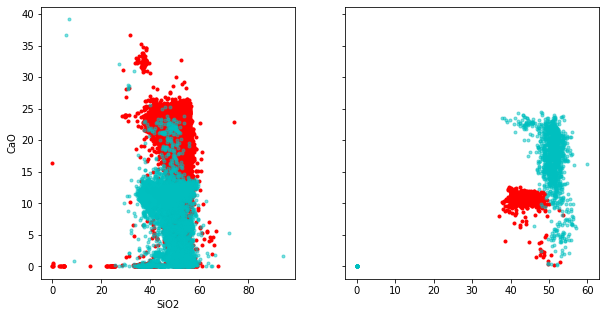

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
ax1.plot(Cpx['SiO2'], Cpx['CaO'], '.r')
ax1.plot(Amp['SiO2'], Amp['CaO'], '.c', alpha=0.5)

ax2.plot(LEPR_Amp_nosuf['SiO2'], LEPR_Amp_nosuf['CaO'], '.r')
ax2.plot(LEPR_Cpx_nosuf['SiO2'], LEPR_Cpx_nosuf['CaO'], '.c', alpha=0.5)

ax1.set_xlabel('SiO2')
ax1.set_ylabel('CaO')

## GEOROC vs LEPR amphiboles

Text(0, 0.5, 'CaO')

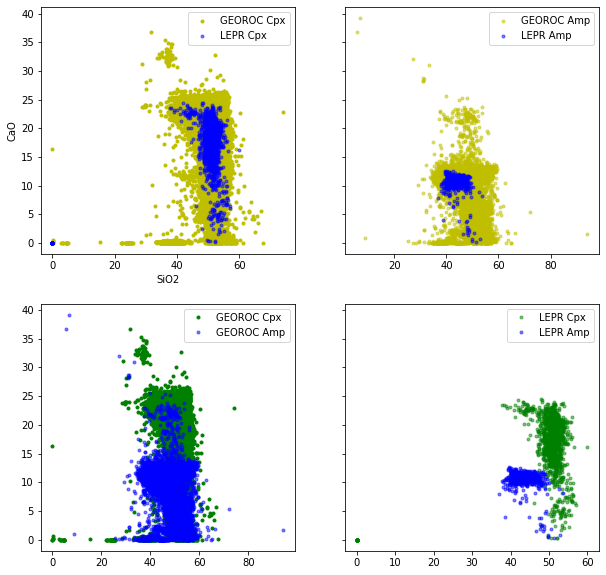

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10), sharey=True)
ax1.plot(Cpx['SiO2'], Cpx['CaO'], '.y', label='GEOROC Cpx')
ax1.plot(LEPR_Cpx_nosuf['SiO2'], LEPR_Cpx_nosuf['CaO'], '.b', alpha=0.5, label='LEPR Cpx')
ax1.legend()

ax2.plot(Amp['SiO2'], Amp['CaO'], '.y', alpha=0.5, label='GEOROC Amp')
ax2.plot(LEPR_Amp_nosuf['SiO2'], LEPR_Amp_nosuf['CaO'], '.b',  alpha=0.5, label='LEPR Amp')
ax2.legend()
ax1.set_xlabel('SiO2')
ax1.set_ylabel('CaO')


ax3.plot(Cpx['SiO2'], Cpx['CaO'], '.g', label='GEOROC Cpx')
ax3.plot(Amp['SiO2'], Amp['CaO'], '.b', alpha=0.5, label='GEOROC Amp')
ax3.legend()

ax4.plot(LEPR_Cpx_nosuf['SiO2'], LEPR_Cpx_nosuf['CaO'], '.g', alpha=0.5, label='LEPR Cpx')
ax4.plot(LEPR_Amp_nosuf['SiO2'], LEPR_Amp_nosuf['CaO'], '.b',  alpha=0.5, label='LEPR Amp')
ax4.legend()
ax1.set_xlabel('SiO2')
ax1.set_ylabel('CaO')

Text(0, 0.5, 'Al2O3')

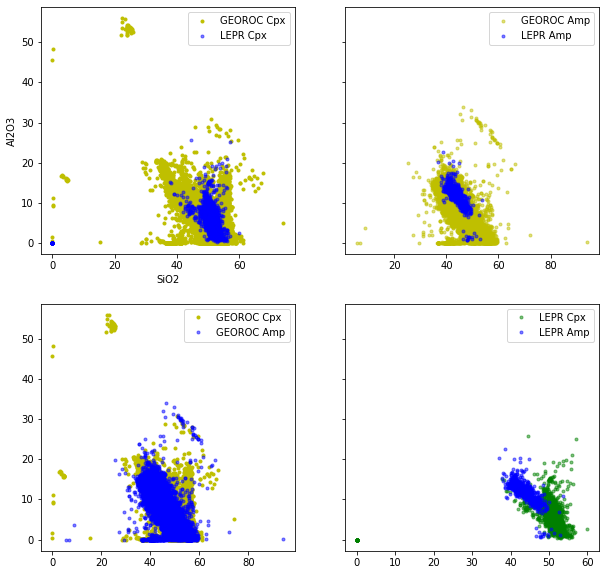

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10), sharey=True)
ax1.plot(Cpx['SiO2'], Cpx['Al2O3'], '.y', label='GEOROC Cpx')
ax1.plot(LEPR_Cpx_nosuf['SiO2'], LEPR_Cpx_nosuf['Al2O3'], '.b', alpha=0.5, label='LEPR Cpx')
ax1.legend()

ax2.plot(Amp['SiO2'], Amp['Al2O3'], '.y', alpha=0.5, label='GEOROC Amp')
ax2.plot(LEPR_Amp_nosuf['SiO2'], LEPR_Amp_nosuf['Al2O3'], '.b',  alpha=0.5, label='LEPR Amp')
ax2.legend()
ax1.set_xlabel('SiO2')
ax1.set_ylabel('Al2O3')


ax3.plot(Cpx['SiO2'], Cpx['Al2O3'], '.y', label='GEOROC Cpx')
ax3.plot(Amp['SiO2'], Amp['Al2O3'], '.b', alpha=0.5, label='GEOROC Amp')
ax3.legend()

ax4.plot(LEPR_Cpx_nosuf['SiO2'], LEPR_Cpx_nosuf['Al2O3'], '.g', alpha=0.5, label='LEPR Cpx')
ax4.plot(LEPR_Amp_nosuf['SiO2'], LEPR_Amp_nosuf['Al2O3'], '.b',  alpha=0.5, label='LEPR Amp')
ax4.legend()
ax1.set_xlabel('SiO2')
ax1.set_ylabel('Al2O3')

Text(0, 0.5, 'K2O')

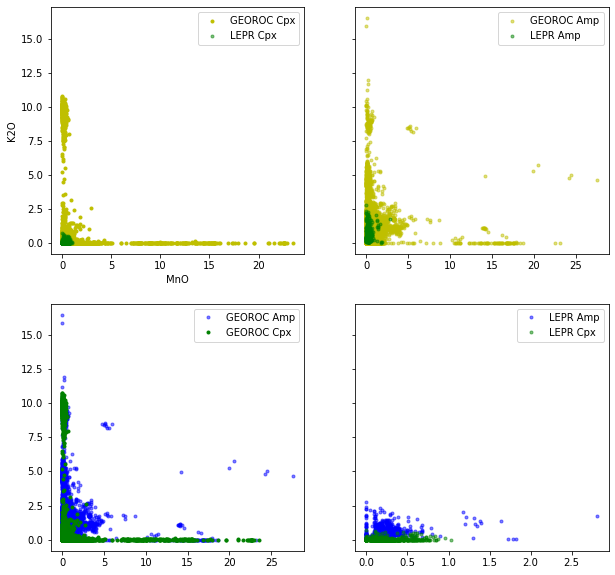

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10), sharey=True)
ax1.plot(Cpx['MnO'], Cpx['K2O'], '.y', label='GEOROC Cpx')
ax1.plot(LEPR_Cpx_nosuf['MnO'], LEPR_Cpx_nosuf['K2O'], '.g', alpha=0.5, label='LEPR Cpx')
ax1.legend()

ax2.plot(Amp['MnO'], Amp['K2O'], '.y', alpha=0.5, label='GEOROC Amp')
ax2.plot(LEPR_Amp_nosuf['MnO'], LEPR_Amp_nosuf['K2O'], '.g',  alpha=0.5, label='LEPR Amp')
ax2.legend()
ax1.set_xlabel('MnO')
ax1.set_ylabel('K2O')


ax3.plot(Amp['MnO'], Amp['K2O'], '.b', alpha=0.5, label='GEOROC Amp')
ax3.plot(Cpx['MnO'], Cpx['K2O'], '.g', label='GEOROC Cpx')

ax3.legend()

ax4.plot(LEPR_Amp_nosuf['MnO'], LEPR_Amp_nosuf['K2O'], '.b',  alpha=0.5, label='LEPR Amp')
ax4.plot(LEPR_Cpx_nosuf['MnO'], LEPR_Cpx_nosuf['K2O'], '.g', alpha=0.5, label='LEPR Cpx')

ax4.legend()
ax1.set_xlabel('MnO')
ax1.set_ylabel('K2O')

## Amphibole sites
- DHZ says Al2o£ limited to 2 atoms per formula unit

In [13]:
Cpx_amp_sites.head()

,SiO2_Amp_cat_23ox,MgO_Amp_cat_23ox,FeOt_Amp_cat_23ox,CaO_Amp_cat_23ox,Al2O3_Amp_cat_23ox,Na2O_Amp_cat_23ox,K2O_Amp_cat_23ox,MnO_Amp_cat_23ox,TiO2_Amp_cat_23ox,Cr2O3_Amp_cat_23ox,...,Fe_C,Mn_C,Cr_C,Mg_B,Fe_B,Mn_B,Na_B,Ca_B,Na_A,K_A
0,7.406694,3.443447,0.417793,3.423664,0.410170,0.130600,0.0,0.0,0.050667,0.079880,...,1.426006,0.0,0.079880,0.0,-1.008213,0.0,0.0,3.423664,0.130600,0.0
1,6.924349,3.216266,0.764256,2.957291,1.175887,0.234227,0.0,0.0,0.132563,0.044945,...,1.505989,0.0,0.044945,0.0,-0.741733,0.0,0.0,2.957291,0.234227,0.0
2,7.019579,3.319621,0.716886,3.197933,0.904922,0.162351,0.0,0.0,0.087539,0.075177,...,1.517664,0.0,0.075177,0.0,-0.800778,0.0,0.0,3.197933,0.162351,0.0
3,7.179159,3.356679,0.664875,3.001000,0.834363,0.198810,0.0,0.0,0.070790,0.084398,...,1.474610,0.0,0.084398,0.0,-0.809735,0.0,0.0,3.001000,0.198810,0.0
4,7.152478,3.564669,0.469140,3.181122,0.730576,0.165868,0.0,0.0,0.094942,0.074287,...,1.266101,0.0,0.074287,0.0,-0.796962,0.0,0.0,3.181122,0.165868,0.0


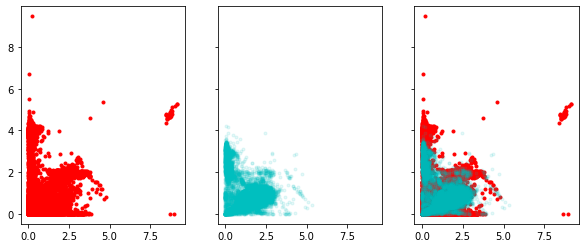

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
ax1.plot(Cpx_amp_sites['Al2O3_Amp_cat_23ox'], Cpx_amp_sites['Na2O_Amp_cat_23ox']+Cpx_amp_sites['K2O_Amp_cat_23ox'], '.r', label='Amp Sites Cpx GEOROC')
ax2.plot(Amp_amp_sites['Al2O3_Amp_cat_23ox'], Amp_amp_sites['Na2O_Amp_cat_23ox']+Amp_amp_sites['K2O_Amp_cat_23ox'], '.c', alpha=0.1, label='Amp Sites Cpx GEOROC')
ax3.plot(Cpx_amp_sites['Al2O3_Amp_cat_23ox'], Cpx_amp_sites['Na2O_Amp_cat_23ox']+Cpx_amp_sites['K2O_Amp_cat_23ox'], '.r', label='Amp Sites Cpx GEOROC')

ax3.plot(Amp_amp_sites['Al2O3_Amp_cat_23ox'], Amp_amp_sites['Na2O_Amp_cat_23ox']+Amp_amp_sites['K2O_Amp_cat_23ox'], '.c', alpha=0.1, label='Amp Sites Cpx GEOROC')


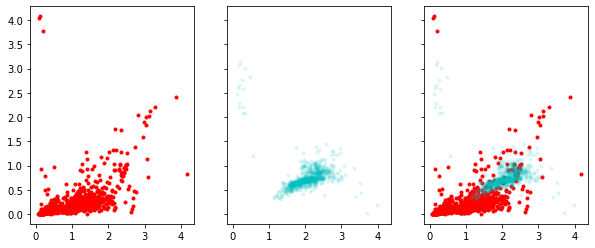

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
ax1.plot(LEPR_Cpx_amp_sites['Al2O3_Amp_cat_23ox'], LEPR_Cpx_amp_sites['Na2O_Amp_cat_23ox']+LEPR_Cpx_amp_sites['K2O_Amp_cat_23ox'], '.r', label='Amp Sites Cpx GEOROC')
ax2.plot(LEPR_Amp_amp_sites['Al2O3_Amp_cat_23ox'], LEPR_Amp_amp_sites['Na2O_Amp_cat_23ox']+LEPR_Amp_amp_sites['K2O_Amp_cat_23ox'], '.c', alpha=0.1, label='Amp Sites Cpx GEOROC')
ax3.plot(LEPR_Cpx_amp_sites['Al2O3_Amp_cat_23ox'], LEPR_Cpx_amp_sites['Na2O_Amp_cat_23ox']+LEPR_Cpx_amp_sites['K2O_Amp_cat_23ox'], '.r', label='Amp Sites Cpx GEOROC')
ax3.plot(LEPR_Amp_amp_sites['Al2O3_Amp_cat_23ox'], LEPR_Amp_amp_sites['Na2O_Amp_cat_23ox']+LEPR_Amp_amp_sites['K2O_Amp_cat_23ox'], '.c', alpha=0.1, label='Amp Sites Cpx GEOROC')


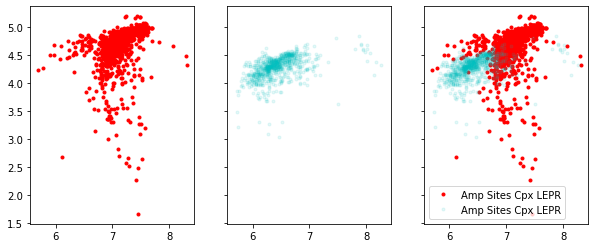

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
ax1.plot(LEPR_Cpx_amp_sites['Si_T'], LEPR_Cpx_amp_sites['Mg_C']+LEPR_Cpx_amp_sites['Fe_C'], '.r', label='Amp Sites Cpx LEPR')
ax2.plot(LEPR_Amp_amp_sites['Si_T'], LEPR_Amp_amp_sites['Mg_C']+LEPR_Amp_amp_sites['Fe_C'], '.c', alpha=0.1, label='Amp Sites Cpx LEPR')
ax3.plot(LEPR_Cpx_amp_sites['Si_T'], LEPR_Cpx_amp_sites['Mg_C']+LEPR_Cpx_amp_sites['Fe_C'], '.r', label='Amp Sites Cpx LEPR')
ax3.plot(LEPR_Amp_amp_sites['Si_T'], LEPR_Amp_amp_sites['Mg_C']+LEPR_Amp_amp_sites['Fe_C'], '.c', alpha=0.1, label='Amp Sites Cpx LEPR')
ax3.legend()

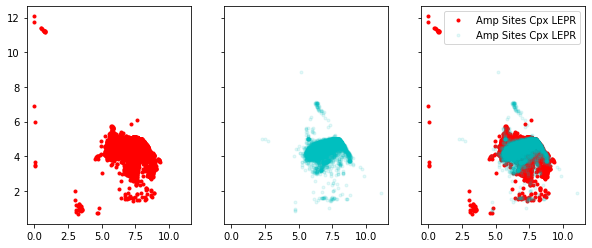

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
ax1.plot(Cpx_amp_sites['Si_T'], Cpx_amp_sites['Mg_C']+Cpx_amp_sites['Fe_C'], '.r', label='Amp Sites Cpx LEPR')
ax2.plot(Amp_amp_sites['Si_T'], Amp_amp_sites['Mg_C']+Amp_amp_sites['Fe_C'], '.c', alpha=0.1, label='Amp Sites Cpx LEPR')
ax3.plot(Cpx_amp_sites['Si_T'], Cpx_amp_sites['Mg_C']+Cpx_amp_sites['Fe_C'], '.r', label='Amp Sites Cpx LEPR')
ax3.plot(Amp_amp_sites['Si_T'], Amp_amp_sites['Mg_C']+Amp_amp_sites['Fe_C'], '.c', alpha=0.1, label='Amp Sites Cpx LEPR')
ax3.legend()

Text(0, 0.5, 'DiHd')

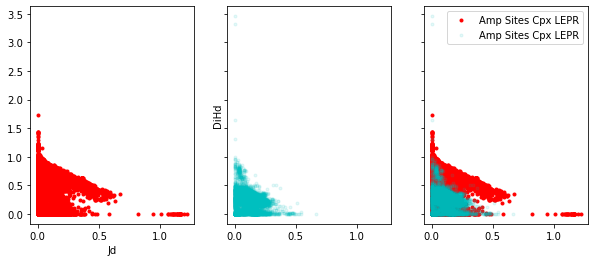

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
ax1.plot(Cpx_cpx_sites['Jd'], Cpx_cpx_sites['DiHd_1996'], '.r', label='Amp Sites Cpx LEPR')
ax2.plot(Amp_cpx_sites['Jd'], Amp_cpx_sites['DiHd_1996'], '.c', alpha=0.1, label='Amp Sites Cpx LEPR')
ax3.plot(Cpx_cpx_sites['Jd'], Cpx_cpx_sites['DiHd_1996'], '.r', label='Amp Sites Cpx LEPR')
ax3.plot(Amp_cpx_sites['Jd'], Amp_cpx_sites['DiHd_1996'], '.c', alpha=0.1, label='Amp Sites Cpx LEPR')
ax3.legend()
ax1.set_xlabel('Jd')
ax2.set_ylabel('DiHd')

Text(0, 0.5, 'DiHd')

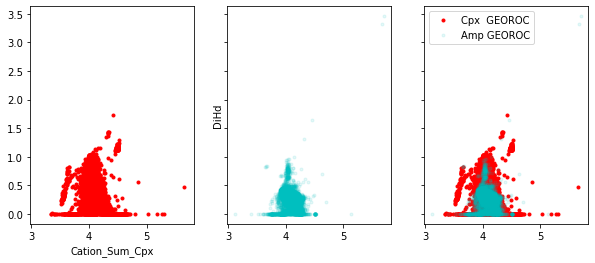

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
ax1.plot(Cpx_cpx_sites['Cation_Sum_Cpx'], Cpx_cpx_sites['DiHd_1996'], '.r', label='Cpx  GEOROC')
ax2.plot(Amp_cpx_sites['Cation_Sum_Cpx'], Amp_cpx_sites['DiHd_1996'], '.c', alpha=0.1, label='Amp GEOROC')
ax3.plot(Cpx_cpx_sites['Cation_Sum_Cpx'], Cpx_cpx_sites['DiHd_1996'], '.r', label='Cpx  GEOROC')
ax3.plot(Amp_cpx_sites['Cation_Sum_Cpx'], Amp_cpx_sites['DiHd_1996'], '.c', alpha=0.1, label='Amp GEOROC')
ax3.legend()
ax1.set_xlabel('Cation_Sum_Cpx')
ax2.set_ylabel('DiHd')

Text(0, 0.5, 'DiHd')

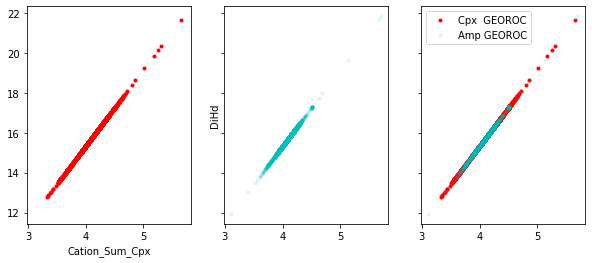

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
ax1.plot(Cpx_cpx_sites['Cation_Sum_Cpx'], Cpx_amp_sites['cation_sum_All'], '.r', label='Cpx  GEOROC')
ax2.plot(Amp_cpx_sites['Cation_Sum_Cpx'], Amp_amp_sites['cation_sum_All'], '.c', alpha=0.1, label='Amp GEOROC')
ax3.plot(Cpx_cpx_sites['Cation_Sum_Cpx'], Cpx_amp_sites['cation_sum_All'], '.r', label='Cpx  GEOROC')
ax3.plot(Amp_cpx_sites['Cation_Sum_Cpx'], Amp_amp_sites['cation_sum_All'], '.c', alpha=0.1, label='Amp GEOROC')
ax3.legend()
ax1.set_xlabel('Cation_Sum_Cpx')
ax2.set_ylabel('Amp sites Cationsum')

## Filter by cation sums

In [81]:
lowcpx=3.95
highcpx=4.05
GEOROC_Cpx_3to4=Cpx_cpx_sites['Cation_Sum_Cpx'].between(lowcpx, highcpx)
GEOROC_Amp_3to4=Amp_cpx_sites['Cation_Sum_Cpx'].between(lowcpx, highcpx)
GEOROC_Cpx_15to16=Cpx_amp_sites['cation_sum_All'].between(15, 16)
GEOROC_Amp_15to16=Amp_amp_sites['cation_sum_All'].between(15, 16)
GEOROC_Cpx_2filt=GEOROC_Cpx_3to4# & GEOROC_Cpx_15to16
GEOROC_Amp_2filt= GEOROC_Amp_15to16#GEOROC_Amp_3to4 &

Text(0, 0.5, 'CaO')

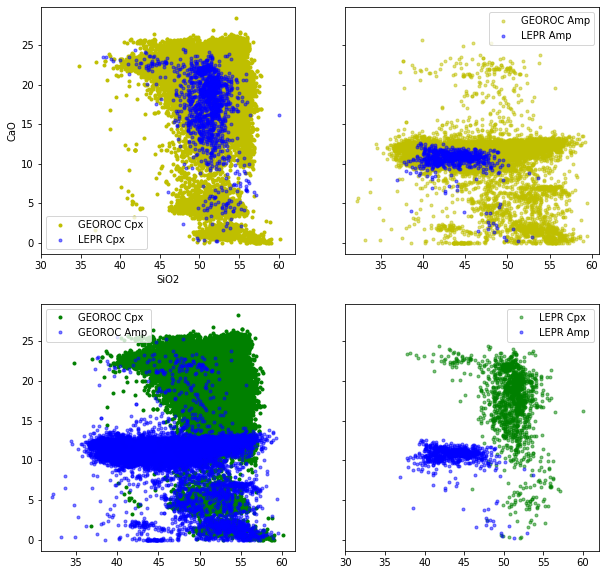

In [96]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10), sharey=True)
ax1.plot(Cpx['SiO2'].loc[GEOROC_Cpx_2filt], Cpx['CaO'].loc[GEOROC_Cpx_2filt], '.y', label='GEOROC Cpx')
ax1.plot(LEPR_Cpx_nosuf['SiO2'], LEPR_Cpx_nosuf['CaO'], '.b', alpha=0.5, label='LEPR Cpx')
ax1.set_xlim([30, 62])
ax1.legend()

ax2.plot(Amp['SiO2'].loc[GEOROC_Amp_2filt], Amp['CaO'].loc[GEOROC_Amp_2filt], '.y', alpha=0.5, label='GEOROC Amp')
ax2.plot(LEPR_Amp_nosuf['SiO2'], LEPR_Amp_nosuf['CaO'], '.b',  alpha=0.5, label='LEPR Amp')
ax2.legend()
ax1.set_xlabel('SiO2')
ax1.set_ylabel('CaO')


ax3.plot(Cpx['SiO2'].loc[GEOROC_Cpx_2filt], Cpx['CaO'].loc[GEOROC_Cpx_2filt], '.g', label='GEOROC Cpx')
ax3.plot(Amp['SiO2'].loc[GEOROC_Amp_2filt], Amp['CaO'].loc[GEOROC_Amp_2filt], '.b', alpha=0.5, label='GEOROC Amp')
ax3.legend()

ax4.plot(LEPR_Cpx_nosuf['SiO2'], LEPR_Cpx_nosuf['CaO'], '.g', alpha=0.5, label='LEPR Cpx')
ax4.plot(LEPR_Amp_nosuf['SiO2'], LEPR_Amp_nosuf['CaO'], '.b',  alpha=0.5, label='LEPR Amp')
ax4.set_xlim([30, 62])
ax4.legend()
ax1.set_xlabel('SiO2')
ax1.set_ylabel('CaO')

In [82]:
print('Percent passing cpx filter')
print(100*sum(GEOROC_Cpx_3to4)/len(Cpx_cpx_sites))
print('Percent passing amp filter')
print(100*sum(GEOROC_Amp_15to16)/len(Amp_cpx_sites))

Percent passing cpx filter
89.90739438444285
Percent passing amp filter
90.12512175020603


Text(0, 0.5, 'DiHd')

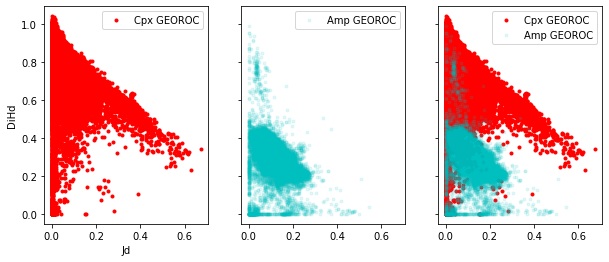

In [97]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
ax1.plot(Cpx_cpx_sites['Jd'].loc[GEOROC_Cpx_2filt], Cpx_cpx_sites['DiHd_1996'].loc[GEOROC_Cpx_2filt], '.r', label='Cpx GEOROC')
ax2.plot(Amp_cpx_sites['Jd'].loc[GEOROC_Amp_2filt], Amp_cpx_sites['DiHd_1996'].loc[GEOROC_Amp_2filt], '.c', alpha=0.1, label='Amp GEOROC')
ax3.plot(Cpx_cpx_sites['Jd'].loc[GEOROC_Cpx_2filt], Cpx_cpx_sites['DiHd_1996'].loc[GEOROC_Cpx_2filt], '.r', label='Cpx GEOROC')
ax3.plot(Amp_cpx_sites['Jd'].loc[GEOROC_Amp_2filt], Amp_cpx_sites['DiHd_1996'].loc[GEOROC_Amp_2filt], '.c', alpha=0.1, label='Amp GEOROC')
ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_xlabel('Jd')
ax1.set_ylabel('DiHd')

Text(0, 0.5, 'DiHd')

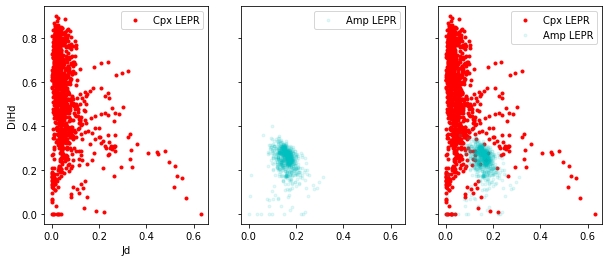

In [100]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
ax1.plot(LEPR_Cpx_cpx_sites['Jd'], LEPR_Cpx_cpx_sites['DiHd_1996'], '.r', label='Cpx LEPR')
ax2.plot(LEPR_Amp_cpx_sites['Jd'], LEPR_Amp_cpx_sites['DiHd_1996'], '.c', alpha=0.1, label='Amp LEPR')
ax3.plot(LEPR_Cpx_cpx_sites['Jd'], LEPR_Cpx_cpx_sites['DiHd_1996'], '.r', label='Cpx LEPR')
ax3.plot(LEPR_Amp_cpx_sites['Jd'], LEPR_Amp_cpx_sites['DiHd_1996'], '.c', alpha=0.1, label='Amp LEPR')
ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_xlabel('Jd')
ax1.set_ylabel('DiHd')

Text(0, 0.5, 'DiHd')

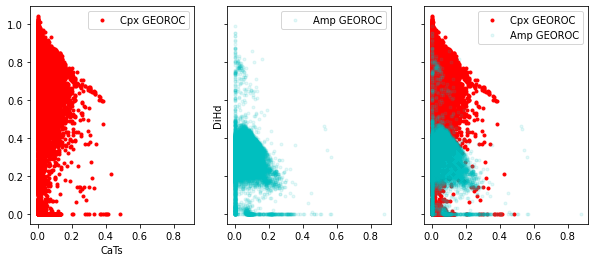

In [84]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
ax1.plot(Cpx_cpx_sites['CaTs'].loc[GEOROC_Cpx_2filt], Cpx_cpx_sites['DiHd_1996'].loc[GEOROC_Cpx_2filt], '.r', label='Cpx GEOROC')
ax2.plot(Amp_cpx_sites['CaTs'].loc[GEOROC_Amp_2filt], Amp_cpx_sites['DiHd_1996'].loc[GEOROC_Amp_2filt], '.c', alpha=0.1, label='Amp GEOROC')
ax3.plot(Cpx_cpx_sites['CaTs'].loc[GEOROC_Cpx_2filt], Cpx_cpx_sites['DiHd_1996'].loc[GEOROC_Cpx_2filt], '.r', label='Cpx GEOROC')
ax3.plot(Amp_cpx_sites['CaTs'].loc[GEOROC_Amp_2filt], Amp_cpx_sites['DiHd_1996'].loc[GEOROC_Amp_2filt], '.c', alpha=0.1, label='Amp GEOROC')
ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_xlabel('CaTs')
ax2.set_ylabel('DiHd')

Text(0, 0.5, 'DiHd')

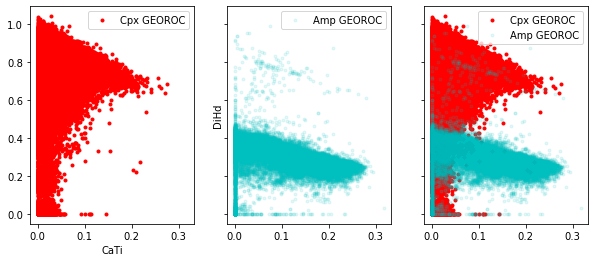

In [85]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
ax1.plot(Cpx_cpx_sites['CaTi'].loc[GEOROC_Cpx_2filt], Cpx_cpx_sites['DiHd_1996'].loc[GEOROC_Cpx_2filt], '.r', label='Cpx GEOROC')
ax2.plot(Amp_cpx_sites['CaTi'].loc[GEOROC_Amp_2filt], Amp_cpx_sites['DiHd_1996'].loc[GEOROC_Amp_2filt], '.c', alpha=0.1, label='Amp GEOROC')
ax3.plot(Cpx_cpx_sites['CaTi'].loc[GEOROC_Cpx_2filt], Cpx_cpx_sites['DiHd_1996'].loc[GEOROC_Cpx_2filt], '.r', label='Cpx GEOROC')
ax3.plot(Amp_cpx_sites['CaTi'].loc[GEOROC_Amp_2filt], Amp_cpx_sites['DiHd_1996'].loc[GEOROC_Amp_2filt], '.c', alpha=0.1, label='Amp GEOROC')
ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_xlabel('CaTi')
ax2.set_ylabel('DiHd')

Text(0, 0.5, 'Ca/CaMgFe')

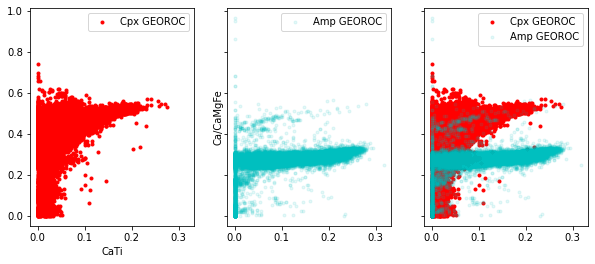

In [87]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
ax1.plot(Cpx_cpx_sites['CaTi'].loc[GEOROC_Cpx_2filt], Cpx_cpx_sites['Ca_CaMgFe'].loc[GEOROC_Cpx_2filt], '.r', label='Cpx GEOROC')
ax2.plot(Amp_cpx_sites['CaTi'].loc[GEOROC_Amp_2filt], Amp_cpx_sites['Ca_CaMgFe'].loc[GEOROC_Amp_2filt], '.c', alpha=0.1, label='Amp GEOROC')
ax3.plot(Cpx_cpx_sites['CaTi'].loc[GEOROC_Cpx_2filt], Cpx_cpx_sites['Ca_CaMgFe'].loc[GEOROC_Cpx_2filt], '.r', label='Cpx GEOROC')
ax3.plot(Amp_cpx_sites['CaTi'].loc[GEOROC_Amp_2filt], Amp_cpx_sites['Ca_CaMgFe'].loc[GEOROC_Amp_2filt], '.c', alpha=0.1, label='Amp GEOROC')
ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_xlabel('CaTi')
ax2.set_ylabel('Ca/CaMgFe')

Text(0, 0.5, 'Ca/CaMgFe')

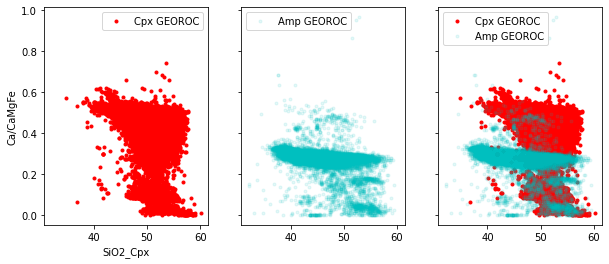

In [102]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
xaxis='SiO2_Cpx'
ax1.plot(Cpx_cpx_sites[xaxis].loc[GEOROC_Cpx_2filt], Cpx_cpx_sites['Ca_CaMgFe'].loc[GEOROC_Cpx_2filt], '.r', label='Cpx GEOROC')
ax2.plot(Amp_cpx_sites[xaxis].loc[GEOROC_Amp_2filt], Amp_cpx_sites['Ca_CaMgFe'].loc[GEOROC_Amp_2filt], '.c', alpha=0.1, label='Amp GEOROC')
ax3.plot(Cpx_cpx_sites[xaxis].loc[GEOROC_Cpx_2filt], Cpx_cpx_sites['Ca_CaMgFe'].loc[GEOROC_Cpx_2filt], '.r', label='Cpx GEOROC')
ax3.plot(Amp_cpx_sites[xaxis].loc[GEOROC_Amp_2filt], Amp_cpx_sites['Ca_CaMgFe'].loc[GEOROC_Amp_2filt], '.c', alpha=0.1, label='Amp GEOROC')
ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_xlabel(xaxis)
ax1.set_ylabel('Ca/CaMgFe')

In [104]:
Cpx_amp_sites['Si_T']

0         7.406694
1         6.924349
2         7.019579
3         7.179159
4         7.152478
            ...   
135084    7.203234
135085    7.176539
135086    7.155802
135087    7.171168
135088    7.178711
Name: Si_T, Length: 135089, dtype: float64

Text(0, 0.5, 'Ca/CaMgFe')

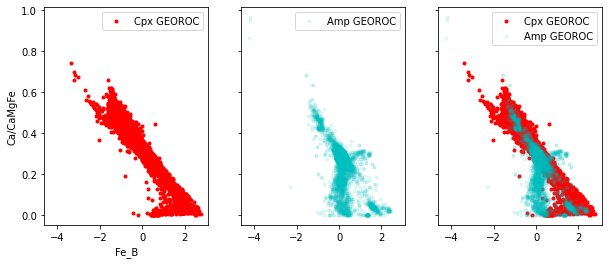

In [109]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
xaxis='Fe_B'
ax1.plot(Cpx_amp_sites[xaxis].loc[GEOROC_Cpx_2filt], Cpx_cpx_sites['Ca_CaMgFe'].loc[GEOROC_Cpx_2filt], '.r', label='Cpx GEOROC')
ax2.plot(Amp_amp_sites[xaxis].loc[GEOROC_Amp_2filt], Amp_cpx_sites['Ca_CaMgFe'].loc[GEOROC_Amp_2filt], '.c', alpha=0.1, label='Amp GEOROC')
ax3.plot(Cpx_amp_sites[xaxis].loc[GEOROC_Cpx_2filt], Cpx_cpx_sites['Ca_CaMgFe'].loc[GEOROC_Cpx_2filt], '.r', label='Cpx GEOROC')
ax3.plot(Amp_amp_sites[xaxis].loc[GEOROC_Amp_2filt], Amp_cpx_sites['Ca_CaMgFe'].loc[GEOROC_Amp_2filt], '.c', alpha=0.1, label='Amp GEOROC')
ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_xlabel(xaxis)
ax1.set_ylabel('Ca/CaMgFe')

Text(0, 0.5, 'Si_T')

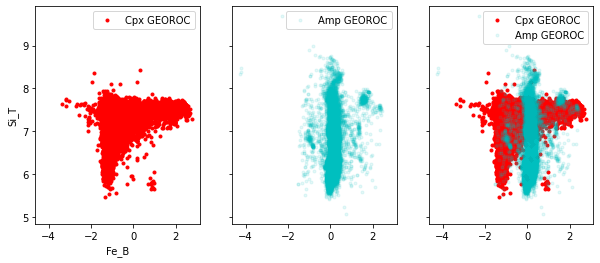

In [110]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
xaxis='Fe_B'
yaxis='Si_T'
ax1.plot(Cpx_amp_sites[xaxis].loc[GEOROC_Cpx_2filt], Cpx_amp_sites[yaxis].loc[GEOROC_Cpx_2filt], '.r', label='Cpx GEOROC')
ax2.plot(Amp_amp_sites[xaxis].loc[GEOROC_Amp_2filt], Amp_amp_sites[yaxis].loc[GEOROC_Amp_2filt], '.c', alpha=0.1, label='Amp GEOROC')
ax3.plot(Cpx_amp_sites[xaxis].loc[GEOROC_Cpx_2filt], Cpx_amp_sites[yaxis].loc[GEOROC_Cpx_2filt], '.r', label='Cpx GEOROC')
ax3.plot(Amp_amp_sites[xaxis].loc[GEOROC_Amp_2filt], Amp_amp_sites[yaxis].loc[GEOROC_Amp_2filt], '.c', alpha=0.1, label='Amp GEOROC')
ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_xlabel(xaxis)
ax1.set_ylabel(yaxis)

Text(0, 0.5, 'Ca_B')

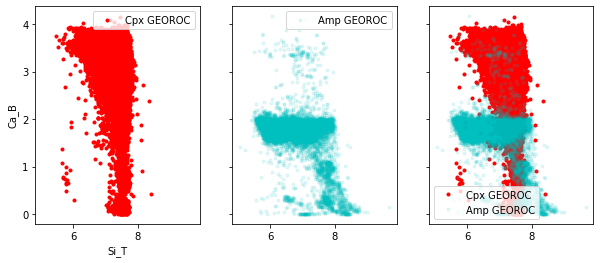

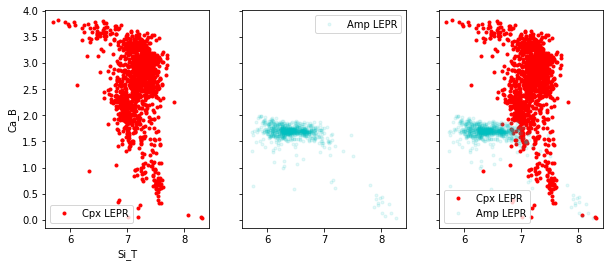

In [126]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
xaxis='Si_T'
yaxis='Ca_B'
ax1.plot(Cpx_amp_sites[xaxis].loc[GEOROC_Cpx_2filt], Cpx_amp_sites[yaxis].loc[GEOROC_Cpx_2filt], '.r', label='Cpx GEOROC')
ax2.plot(Amp_amp_sites[xaxis].loc[GEOROC_Amp_2filt], Amp_amp_sites[yaxis].loc[GEOROC_Amp_2filt], '.c', alpha=0.1, label='Amp GEOROC')
ax3.plot(Cpx_amp_sites[xaxis].loc[GEOROC_Cpx_2filt], Cpx_amp_sites[yaxis].loc[GEOROC_Cpx_2filt], '.r', label='Cpx GEOROC')
ax3.plot(Amp_amp_sites[xaxis].loc[GEOROC_Amp_2filt], Amp_amp_sites[yaxis].loc[GEOROC_Amp_2filt], '.c', alpha=0.1, label='Amp GEOROC')
ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_xlabel(xaxis)
ax1.set_ylabel(yaxis)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)

ax1.plot(LEPR_Cpx_amp_sites[xaxis], LEPR_Cpx_amp_sites[yaxis], '.r', label='Cpx LEPR')
ax2.plot(LEPR_Amp_amp_sites[xaxis], LEPR_Amp_amp_sites[yaxis], '.c', alpha=0.1, label='Amp LEPR')
ax3.plot(LEPR_Cpx_amp_sites[xaxis], LEPR_Cpx_amp_sites[yaxis], '.r', label='Cpx LEPR')
ax3.plot(LEPR_Amp_amp_sites[xaxis], LEPR_Amp_amp_sites[yaxis], '.c', alpha=0.1, label='Amp LEPR')
ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_xlabel(xaxis)
ax1.set_ylabel(yaxis)

Text(0, 0.5, 'Si_T')

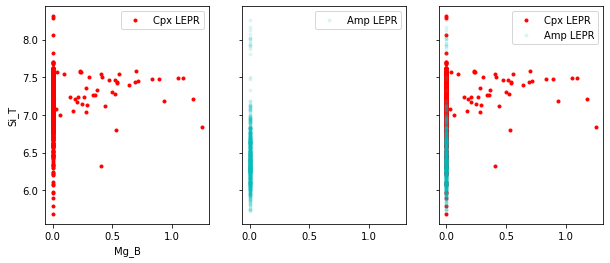

In [112]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True, sharex=True)
xaxis='Mg_B'
yaxis='Si_T'
ax1.plot(LEPR_Cpx_amp_sites[xaxis], LEPR_Cpx_amp_sites[yaxis], '.r', label='Cpx LEPR')
ax2.plot(LEPR_Amp_amp_sites[xaxis], LEPR_Amp_amp_sites[yaxis], '.c', alpha=0.1, label='Amp LEPR')
ax3.plot(LEPR_Cpx_amp_sites[xaxis], LEPR_Cpx_amp_sites[yaxis], '.r', label='Cpx LEPR')
ax3.plot(LEPR_Amp_amp_sites[xaxis], LEPR_Amp_amp_sites[yaxis], '.c', alpha=0.1, label='Amp LEPR')
ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_xlabel(xaxis)
ax1.set_ylabel(yaxis)

In [107]:
Cpx_amp_sites

,SiO2_Amp_cat_23ox,MgO_Amp_cat_23ox,FeOt_Amp_cat_23ox,CaO_Amp_cat_23ox,Al2O3_Amp_cat_23ox,Na2O_Amp_cat_23ox,K2O_Amp_cat_23ox,MnO_Amp_cat_23ox,TiO2_Amp_cat_23ox,Cr2O3_Amp_cat_23ox,...,Fe_C,Mn_C,Cr_C,Mg_B,Fe_B,Mn_B,Na_B,Ca_B,Na_A,K_A
0,7.406694,3.443447,0.417793,3.423664,0.410170,0.130600,0.0,0.000000,0.050667,0.079880,...,1.426006,0.0,0.079880,0.0,-1.008213,0.000000,0.000000,3.423664,0.130600,0.0
1,6.924349,3.216266,0.764256,2.957291,1.175887,0.234227,0.0,0.000000,0.132563,0.044945,...,1.505989,0.0,0.044945,0.0,-0.741733,0.000000,0.000000,2.957291,0.234227,0.0
2,7.019579,3.319621,0.716886,3.197933,0.904922,0.162351,0.0,0.000000,0.087539,0.075177,...,1.517664,0.0,0.075177,0.0,-0.800778,0.000000,0.000000,3.197933,0.162351,0.0
3,7.179159,3.356679,0.664875,3.001000,0.834363,0.198810,0.0,0.000000,0.070790,0.084398,...,1.474610,0.0,0.084398,0.0,-0.809735,0.000000,0.000000,3.001000,0.198810,0.0
4,7.152478,3.564669,0.469140,3.181122,0.730576,0.165868,0.0,0.000000,0.094942,0.074287,...,1.266101,0.0,0.074287,0.0,-0.796962,0.000000,0.000000,3.181122,0.165868,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135084,7.203234,3.217396,0.310396,3.034147,1.069294,0.373140,0.0,0.011643,0.041360,0.097812,...,1.370904,0.0,0.097812,0.0,-1.060508,0.011643,0.014718,3.034147,0.358422,0.0
135085,7.176539,3.209555,0.323166,3.046155,1.089792,0.382644,0.0,0.011690,0.041524,0.098199,...,1.384391,0.0,0.098199,0.0,-1.061225,0.011690,0.003380,3.046155,0.379264,0.0
135086,7.155802,3.241310,0.356757,3.007864,1.102861,0.397547,0.0,0.011656,0.051755,0.076156,...,1.372116,0.0,0.076156,0.0,-1.015359,0.011656,0.000000,3.007864,0.397547,0.0
135087,7.171168,3.166036,0.357523,3.029100,1.088976,0.409096,0.0,0.011681,0.062240,0.087223,...,1.424358,0.0,0.087223,0.0,-1.066835,0.011681,0.026055,3.029100,0.383041,0.0


## Does amphibole offset from total correlate with anthing?

In [64]:
Amp_input=Amp_filt_in['my_input']

In [70]:
Sum_GEOROC_Amp=Amp_input.sum(axis=1)-Amp_input['Unnamed: 0']

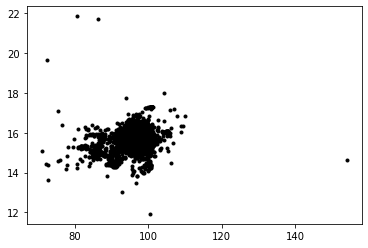

In [72]:
plt.plot(Sum_GEOROC_Amp,Amp_amp_sites['cation_sum_All'], '.k' )

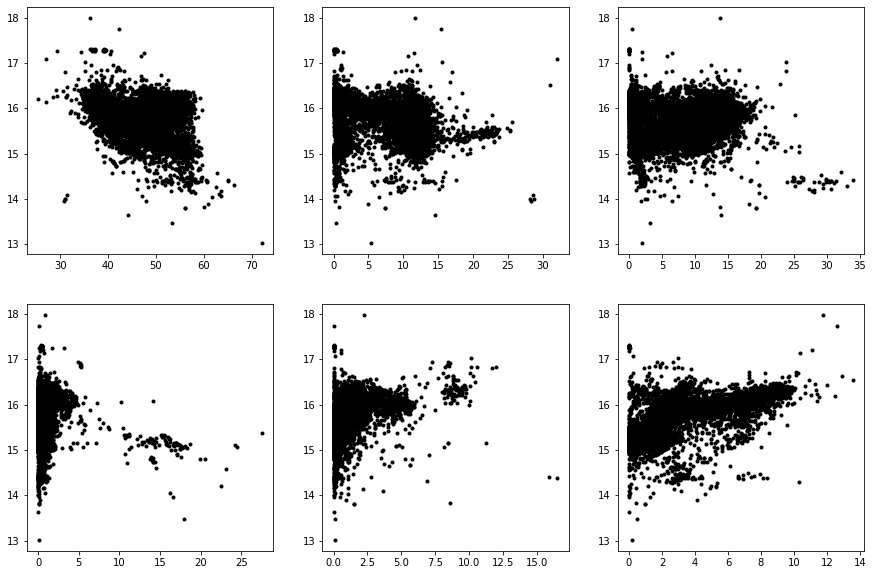

In [75]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,10))#, sharey=True, sharex=True)
filt=Amp_amp_sites['cation_sum_All'].between(13, 18)
ax1.plot(Amp['SiO2'].loc[filt],Amp_amp_sites['cation_sum_All'].loc[filt],  '.k')
ax2.plot( Amp['CaO'].loc[filt], Amp_amp_sites['cation_sum_All'].loc[filt],'.k')
ax3.plot( Amp['Al2O3'].loc[filt], Amp_amp_sites['cation_sum_All'].loc[filt],'.k')
ax4.plot(Amp['MnO'].loc[filt], Amp_amp_sites['cation_sum_All'].loc[filt], '.k')
ax5.plot(Amp['K2O'].loc[filt], Amp_amp_sites['cation_sum_All'].loc[filt], '.k')
ax6.plot(Amp['Na2O'].loc[filt], Amp_amp_sites['cation_sum_All'].loc[filt], '.k')